<a href="https://colab.research.google.com/github/tejareddytadi/Brain-Tumor-Detection-using-CNN/blob/main/dlfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
current_directory = os.getcwd()
for dirname, _, filenames in os.walk('current_directory'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [ ]:
folder_path_no = "/content/drive/MyDrive/archive (1)/no"
folder_path_yes = "/content/drive/MyDrive/archive (1)/yes"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

98
155


In [ ]:
## We can consider
   # No Tumor  >> 0
   # Yes Tumor >> 1

no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)

labels = no_label + yes_label
print(len(labels))

253


In [ ]:
data = []

for img in folder_no:
    image = Image.open("/content/drive/MyDrive/archive (1)/no/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open("/content/drive/MyDrive/archive (1)/yes/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [ ]:
len(data)

253

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the augmenter on the original data
datagen.fit(x)

# Number of augmented images per original image
augmentation_factor = 3

# Augment the data and combine with the original data
augmented_data = []
augmented_labels = []

for i in range(len(x)):
    img = x[i]
    label = y[i]

    # Reshape the image to (1, height, width, channels) for flow method
    img = img.reshape((1,) + img.shape)

    # Generate augmented images
    augmented_images = datagen.flow(img, batch_size=1)

    # Append the original image
    augmented_data.append(img.reshape(img.shape[1:]))
    augmented_labels.append(label)

    # Append the augmented images
    for j in range(augmentation_factor - 1):
        augmented_data.append(augmented_images.next().reshape(img.shape[1:]))
        augmented_labels.append(label)

# Convert lists to arrays
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented data
x_augmented = np.concatenate((x, augmented_data))
y_augmented = np.concatenate((y, augmented_labels))

print("Original data shape:", x.shape)
print("Augmented data shape:", x_augmented.shape)
print("Original labels shape:", y.shape)
print("Augmented labels shape:", y_augmented.shape)

Original data shape: (253, 224, 224, 3)
Augmented data shape: (1012, 224, 224, 3)
Original labels shape: (253,)
Augmented labels shape: (1012,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_augmented,y_augmented,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(809, 224, 224, 3)
(203, 224, 224, 3)
(809,)
(203,)


In [ ]:
x_train_normalized = x_train / 255.0
print("Augmented data shape:", x_train_normalized.shape)

Augmented data shape: (809, 224, 224, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

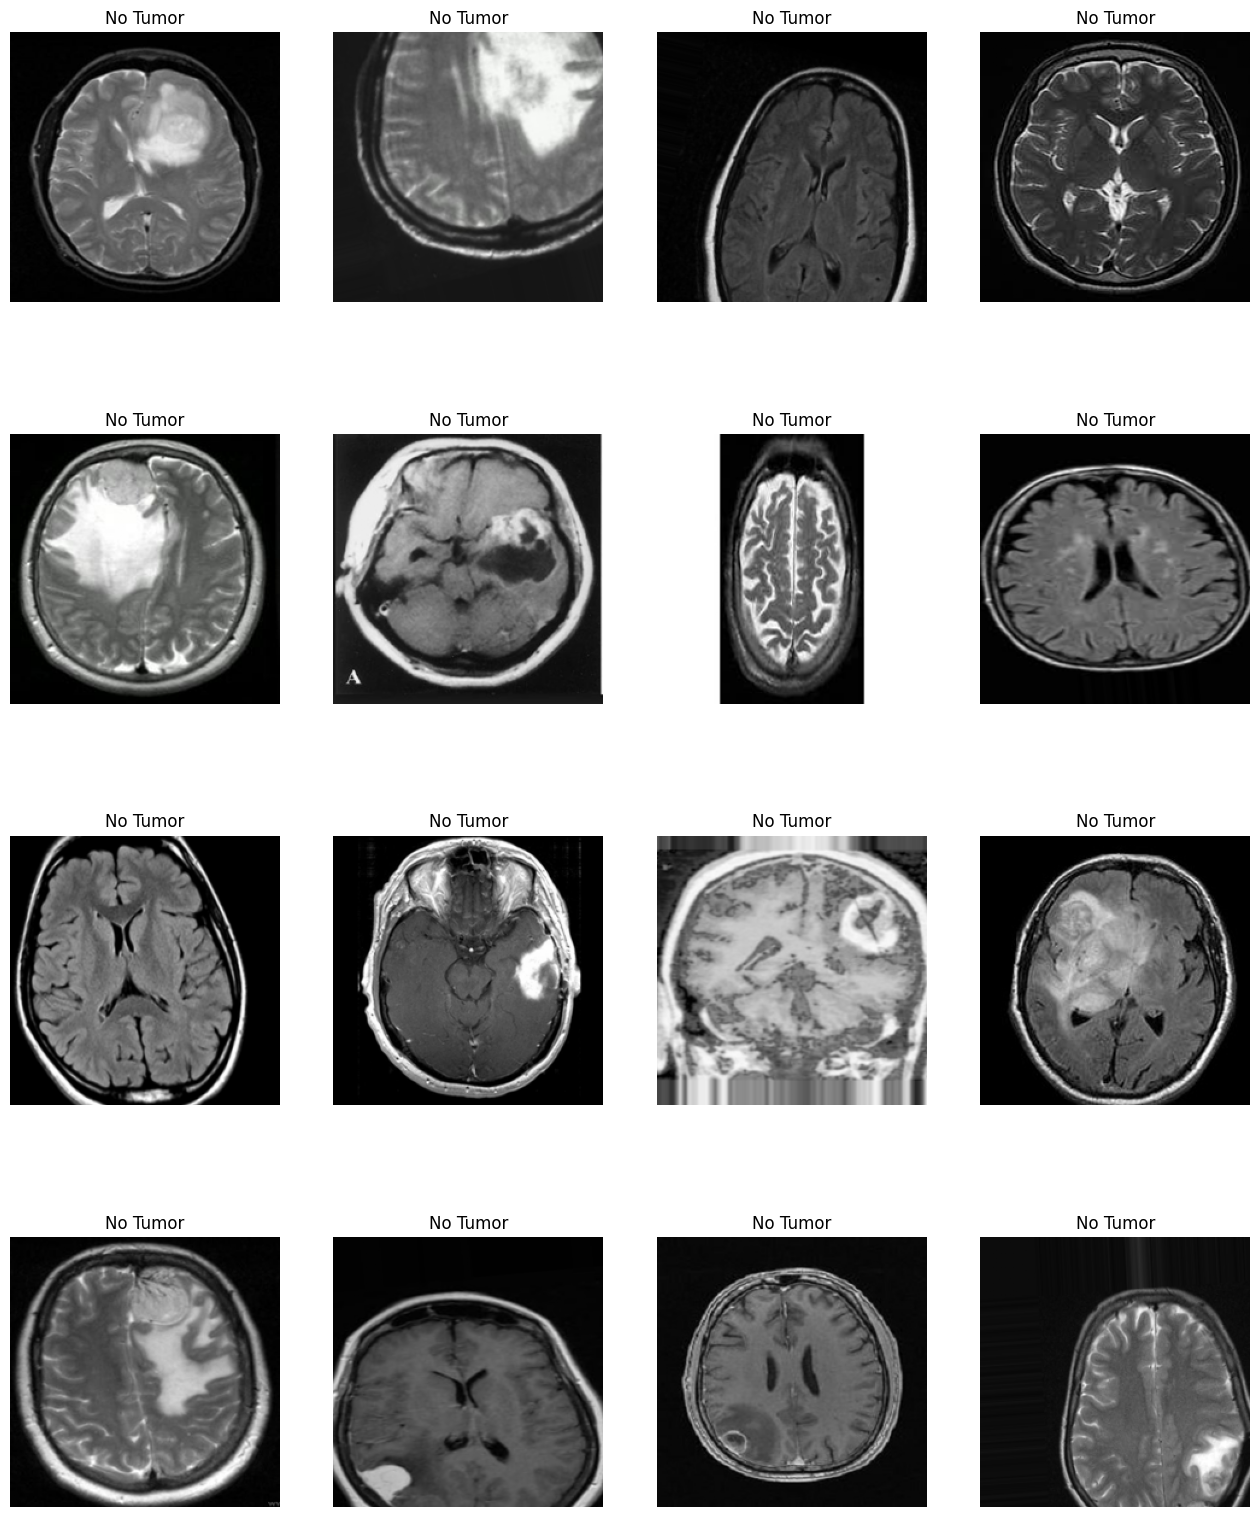

In [ ]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow( x_train_normalized[i+1])
    plt.title(f"{class_labels[y_augmented[i+1]]}")
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense_1 (Dense)             (None, 500)              

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_test_scaled,y_test))  # batch_size=32

Epoch 1/10
26/26 [==============================] - 173s 7s/step - loss: 0.8329 - accuracy: 0.6625 - val_loss: 0.5652 - val_accuracy: 0.6995
Epoch 2/10
26/26 [==============================] - 167s 6s/step - loss: 0.4510 - accuracy: 0.8059 - val_loss: 0.4647 - val_accuracy: 0.7685
Epoch 3/10
26/26 [==============================] - 173s 7s/step - loss: 0.2320 - accuracy: 0.9011 - val_loss: 0.5242 - val_accuracy: 0.7931
Epoch 4/10
26/26 [==============================] - 165s 6s/step - loss: 0.1108 - accuracy: 0.9642 - val_loss: 0.7408 - val_accuracy: 0.7833
Epoch 5/10
26/26 [==============================] - 163s 6s/step - loss: 0.0873 - accuracy: 0.9679 - val_loss: 0.8153 - val_accuracy: 0.7980
Epoch 6/10
26/26 [==============================] - 164s 6s/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 1.0406 - val_accuracy: 0.7833
Epoch 7/10
26/26 [==============================] - 163s 6s/step - loss: 0.0411 - accuracy: 0.9901 - val_loss: 0.9129 - val_accuracy: 0.7833
Epoch 8/10
26

In [ ]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

7/7 [==============================] - 9s 1s/step - loss: 1.3834 - accuracy: 0.7635
Accuracy on Test Data: 0.7635468244552612


relu and sigmoid

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[early_stopping])  # batch_size=32

Epoch 1/10
26/26 [==============================] - 154s 6s/step - loss: 0.1904 - accuracy: 0.9184 - val_loss: 0.4866 - val_accuracy: 0.7980
Epoch 2/10
26/26 [==============================] - 130s 5s/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.8009 - val_accuracy: 0.8079
Epoch 3/10
26/26 [==============================] - 133s 5s/step - loss: 0.0982 - accuracy: 0.9716 - val_loss: 0.8312 - val_accuracy: 0.7882
Epoch 4/10
26/26 [==============================] - 128s 5s/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.7452 - val_accuracy: 0.8030


In [ ]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

7/7 [==============================] - 9s 1s/step - loss: 0.4866 - accuracy: 0.7980
Accuracy on Test Data: 0.7980295419692993


tanh and xavier

In [ ]:
import tensorflow as tf  # Assuming you're using TensorFlow

model = tf.keras.Sequential()

# Input layer
model.add(tf.keras.Input(shape=(224, 224, 3)))

# Convolutional layers with Xavier initialization
model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Optional additional convolutional layer (uncomment if needed)
# model.add(tf.keras.layers.Conv2D(filters=34, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(tf.keras.layers.Flatten())

# Dense layers with Xavier initialization
model.add(tf.keras.layers.Dense(units=256, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(units=256, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.Dropout(0.6))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 80)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 186624)            0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[early_stopping])  # batch_size=32

Epoch 1/10
26/26 [==============================] - 140s 5s/step - loss: 0.9707 - accuracy: 0.6378 - val_loss: 0.5452 - val_accuracy: 0.7241
Epoch 2/10
26/26 [==============================] - 139s 5s/step - loss: 0.5328 - accuracy: 0.7478 - val_loss: 0.5073 - val_accuracy: 0.7586
Epoch 3/10
26/26 [==============================] - 140s 5s/step - loss: 0.3524 - accuracy: 0.8578 - val_loss: 0.5713 - val_accuracy: 0.7389
Epoch 4/10
26/26 [==============================] - 137s 5s/step - loss: 0.2149 - accuracy: 0.9283 - val_loss: 0.6128 - val_accuracy: 0.7734
Epoch 5/10
26/26 [==============================] - 138s 5s/step - loss: 0.1056 - accuracy: 0.9629 - val_loss: 0.8244 - val_accuracy: 0.7685


In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

y_pred[:6]

1/1 [==============================] - 2s 2s/step


[1, 0, 1, 1, 1, 0]

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 6  4]
 [ 2 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.78      0.88      0.82        16

    accuracy                           0.77        26
   macro avg       0.76      0.74      0.75        26
weighted avg       0.77      0.77      0.76        26



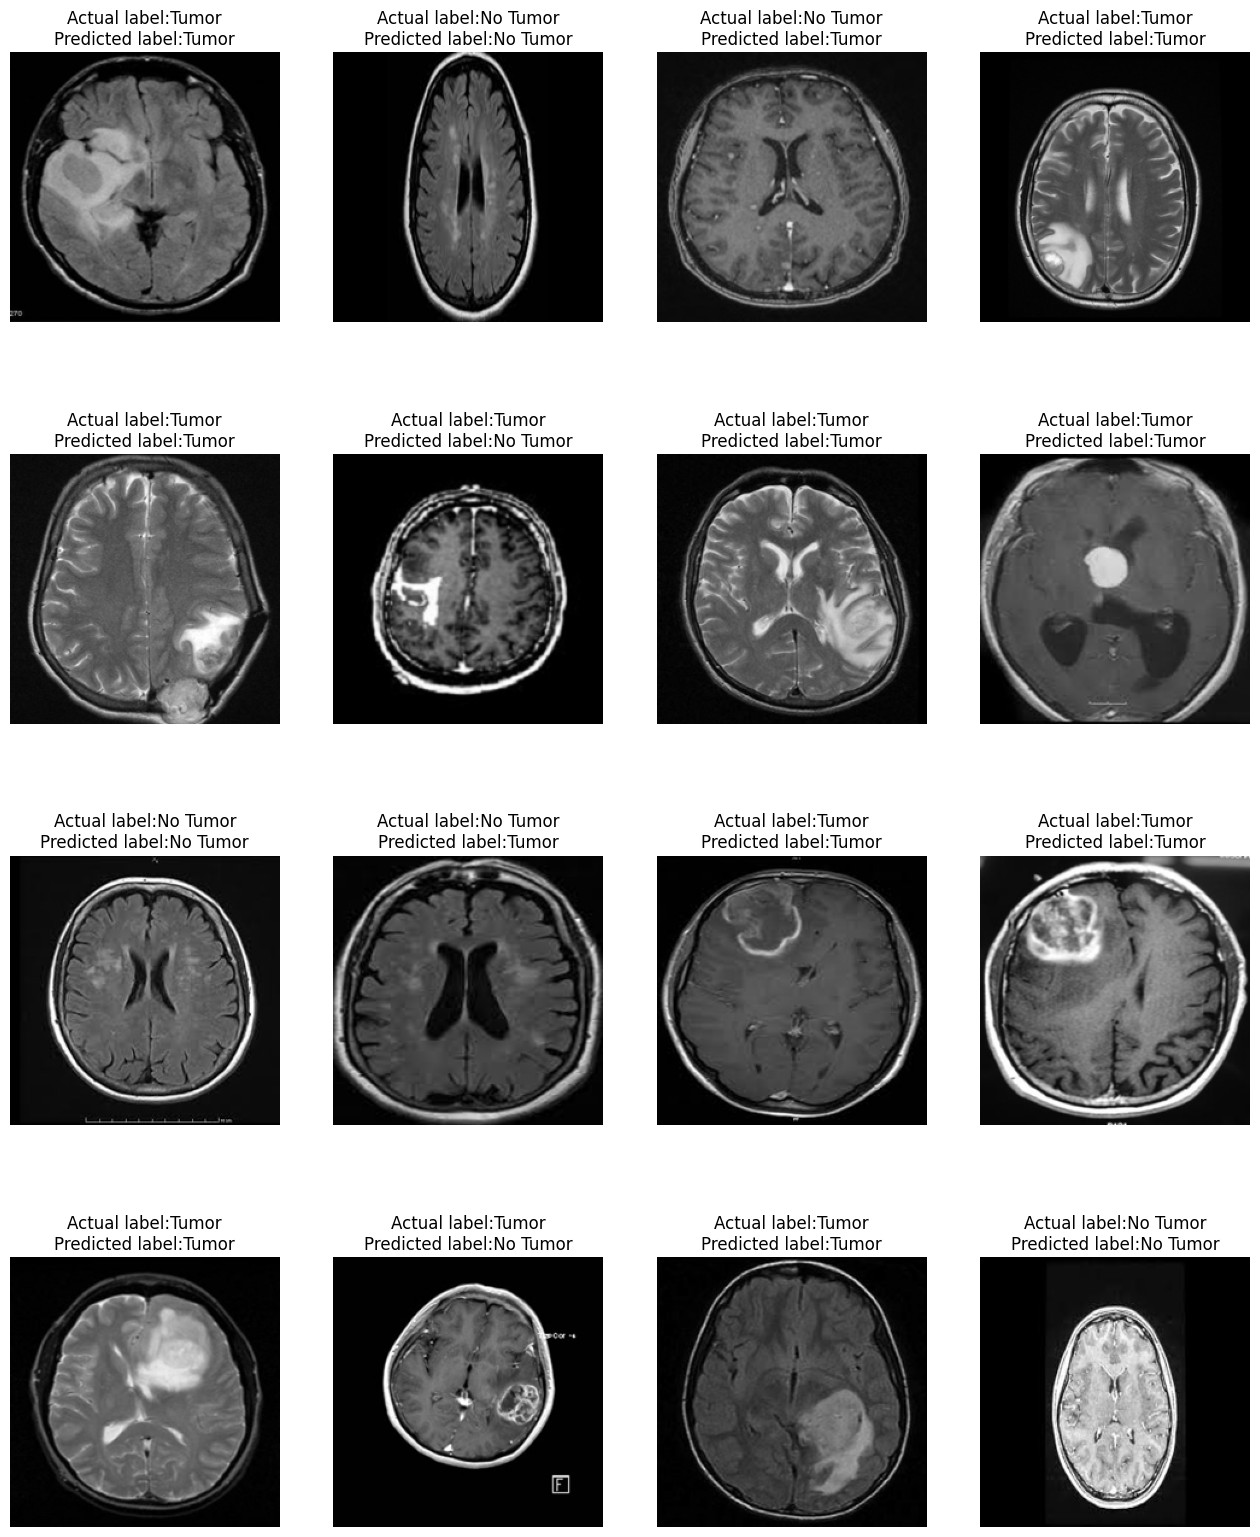

In [ ]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

In [ ]:
# Assuming you have already loaded and compiled the model

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test_scaled, y_test)

# Print the test accuracy
print("Accuracy on Test Data:", accuracy)


1/1 [==============================] - 4s 4s/step - loss: 1.1280 - accuracy: 0.6154
Accuracy on Test Data: 0.6153846383094788


efficient net

In [ ]:
path = "https://tfhub.dev/google/efficientnet/b0/classification/1" # 224x224x3
efficient_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

eff_model = Sequential()
eff_model.add(efficient_model)
eff_model.add(Dense(units=1, activation="sigmoid"))
eff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 5331565 (20.34 MB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 5330564 (20.33 MB)
_________________________________________________________________


In [ ]:
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_4 = eff_model.fit(x_train_scaled , y_train,
           epochs=10, validation_data=(x_test_scaled,y_test))

Epoch 1/10
26/26 [==============================] - 76s 3s/step - loss: 0.6499 - accuracy: 0.6588 - val_loss: 0.4845 - val_accuracy: 0.7882
Epoch 2/10
26/26 [==============================] - 72s 3s/step - loss: 0.3600 - accuracy: 0.8702 - val_loss: 0.4355 - val_accuracy: 0.8374
Epoch 3/10
26/26 [==============================] - 72s 3s/step - loss: 0.3043 - accuracy: 0.8986 - val_loss: 0.3840 - val_accuracy: 0.8571
Epoch 4/10
26/26 [==============================] - 70s 3s/step - loss: 0.2640 - accuracy: 0.9159 - val_loss: 0.3472 - val_accuracy: 0.8522
Epoch 5/10
26/26 [==============================] - 64s 2s/step - loss: 0.2358 - accuracy: 0.9308 - val_loss: 0.3273 - val_accuracy: 0.8670
Epoch 6/10
26/26 [==============================] - 71s 3s/step - loss: 0.2210 - accuracy: 0.9320 - val_loss: 0.3198 - val_accuracy: 0.8719
Epoch 7/10
26/26 [==============================] - 60s 2s/step - loss: 0.2058 - accuracy: 0.9431 - val_loss: 0.3041 - val_accuracy: 0.8867
Epoch 8/10
26/26 [==

In [ ]:
loss, acc = eff_model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

7/7 [==============================] - 17s 2s/step - loss: 0.2865 - accuracy: 0.8768
Accuracy on Test Data: 0.8768472671508789
